In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from opticalglass.glassfactory import create_glass, get_glass_catalog

In [3]:
catalog = 'Hoya'
gname = 'FCD1'
gname1 = 'E-F2'
gname2 = 'MC-TAF1'

In [4]:
hoya_pd = get_glass_catalog('Hoya')
hoya_df = hoya_pd.df

In [5]:
fcd1_pd = hoya_pd.glass_data('FCD1')

In [6]:
hoya_df.columns.get_level_values(0).drop_duplicates()

Index([                                                                  'Code',
                                                             'refractive index',
                                                                  'abbe number',
                                                           'refractive indices',
                                                                        'blank',
                                                      'dispersion coefficients',
                                                          'Partial Dispersions',
                                                    'Partial Dispersion Ratio ',
                                    'Deviation of Relative Partial Dispersions',
                                                          'chemical properties',
                                                           'thermal properties',
                                                        'mechanical properties',
                            

In [7]:
fcd1_pd['dispersion coefficients']

data item
A0       2.218113
A0pow           0
A1      -5.799427
A1pow          -3
A2       8.347068
A2pow          -3
A3       6.504652
A3pow          -5
A4       8.514219
A4pow          -6
A5      -5.885227
A5pow          -7
Name: FCD1, dtype: object

In [8]:
fcd1_pd['refractive indices']

data item
1529.6     1.48598
1128.64    1.48907
t          1.49008
s          1.49182
A'           1.493
r          1.49408
C          1.49514
C'         1.49543
He-Ne      1.49571
D          1.49694
d            1.497
e          1.49845
F          1.50123
F'         1.50157
g          1.50451
h          1.50721
i          1.51175
Name: FCD1, dtype: object

In [9]:
fcd1_pd['refractive indices']["F'"]

1.50157

In [10]:
indices = fcd1_pd['refractive indices'].to_numpy(dtype=float); indices

array([1.48598, 1.48907, 1.49008, 1.49182, 1.493  , 1.49408, 1.49514,
       1.49543, 1.49571, 1.49694, 1.497  , 1.49845, 1.50123, 1.50157,
       1.50451, 1.50721, 1.51175])

In [11]:
fcd1_pd['internal transmission mm, 10']

data item
2500      0.999
2400.0    0.999
2200.0    0.999
2000.0    0.999
1800.0    0.999
1600.0    0.999
1550.0    0.999
1500.0    0.999
1400.0    0.999
1300.0    0.999
1200.0    0.999
1100      0.999
1060.0    0.999
1050.0    0.999
1000.0    0.999
950.0     0.999
900.0     0.999
850.0     0.999
830.0     0.999
800.0     0.999
780.0     0.999
750.0     0.999
700       0.999
650.0     0.998
600.0     0.999
550.0     0.999
500.0     0.999
480.0     0.999
460.0     0.997
440.0     0.997
420.0     0.997
400.0     0.995
390.0     0.996
380       0.995
370.0      0.99
360.0     0.972
350.0     0.939
340.0     0.878
330.0     0.761
320.0     0.586
310.0     0.376
300.0      0.19
290.0     0.077
280.0     0.027
Name: FCD1, dtype: object

<AxesSubplot:xlabel='data item'>

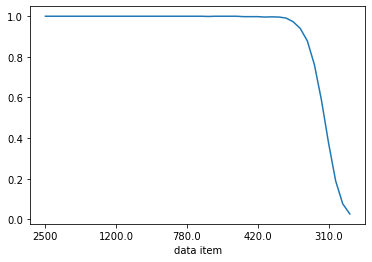

In [12]:
fcd1_pd['internal transmission mm, 10'].T.plot()

<AxesSubplot:xlabel='data item'>

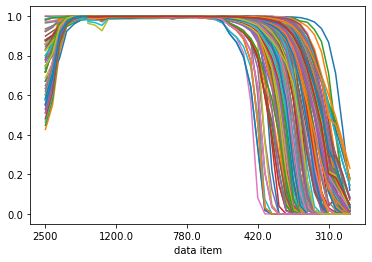

In [13]:
hoya_df['internal transmission mm, 10'].T.plot(legend=False)

<AxesSubplot:xlabel='data item'>

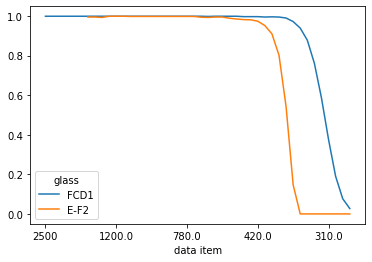

In [14]:
hoya_df.loc[['FCD1', 'E-F2']]['internal transmission mm, 10'].T.plot()

In [15]:
fcd1 = create_glass('FCD1', 'Hoya')
ef2 = create_glass('E-F2', 'Hoya')

In [16]:
wvls = fcd1.glass_data()['refractive indices'].index; wvls

Index([ 1529.6, 1128.64,     't',     's',    'A'',     'r',     'C',    'C'',
       'He-Ne',     'D',     'd',     'e',     'F',    'F'',     'g',     'h',
           'i'],
      dtype='object', name='data item')

In [17]:
print(" wvl     meas n   interp n    delta")
for w_str in wvls:
    n_line = fcd1.meas_rindex(w_str)
    try:
        n_intrp = fcd1.rindex(w_str)
    except KeyError:
        print(f'{w_str}: {n_line}, Key error')
    else:
        print(f'{str(w_str):7s} {n_line:8.5f}  {n_intrp:8.5f}  {n_intrp-n_line:8.2g}')

 wvl     meas n   interp n    delta
1529.6   1.48598   1.48598    -4e-06
1128.64  1.48907   1.48907  -2.4e-06
t        1.49008   1.49008    -2e-07
s        1.49182   1.49182   4.9e-06
A'       1.49300   1.49300   3.3e-06
r        1.49408   1.49408  -4.9e-06
C        1.49514   1.49514  -2.5e-06
C'       1.49543   1.49543   4.1e-06
He-Ne    1.49571   1.49571   9.4e-07
D        1.49694   1.49694   2.9e-06
d        1.49700   1.49700  -2.8e-06
e        1.49845   1.49845   4.7e-07
F        1.50123   1.50123  -2.5e-06
F'       1.50157   1.50157   2.4e-06
g        1.50451   1.50451  -8.7e-07
h        1.50721   1.50721   1.2e-06
i        1.51175   1.51175  -6.4e-07


In [18]:
fcd1_v2 = hoya_pd.create_glass('FCD1', 'Hoya')

In [19]:
fcd1_v2.meas_rindex('F')

1.50123

In [20]:
fcd1_v2.glass_code()

'497.816'

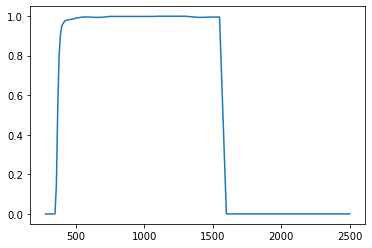

In [21]:
plt.plot(*ef2.transmission_data())